# Rozdělení náhodných veličin v modulu *scipy.stats*

In [1]:
# načtení modulů
import numpy as np                   # balík pro práci s poli 
from scipy import stats              # modul pro práci s rozděleními náhodných veličin 
from matplotlib import pyplot as plt # modul pro práci s grafy

## Modul *scipy.stats*

Modul *scipy.stats* obsahuje třídy reprezentující jednotlivá vybraná rozdělení.
<table align="left">
    <tr> <td> stats.binom </td> <td> binomické rozdělení </td> </tr>
    <tr> <td> stats.nbinom  </td> <td>  negativně binomické rozdělení <sup>*)</sup> </td>  </tr> 
    <tr> <td> stats.geom  </td> <td>  geometrické rozdělení </td>  </tr>
    <tr> <td> stats.hypergeom  </td> <td>  hypergeometrické rozdělení </td> </tr>
    <tr> <td> stats.poisson  </td> <td>  Poissnovo rozdělení </td> </tr>
    <tr> <td> stats.uniform </td> <td> rovnoměrné rozdělení </td> </tr>
    <tr> <td> stats.norm </td> <td> normální rozdělení </td> </tr>
    <tr> <td> stats.expon </td> <td> exponenciální rozdělení </td> </tr>
    <tr> <td> stats.gamma </td> <td> gama rozdělení </td> </tr>
    <tr> <td> ... </td> <td> ... </td> </tr>
</table>  

<sup> *) </sup> V scipy odpovídá **negativně binomická** veličina počtu **neúspěchů** před n. úspěchem. 

Každá třída obsahuje metody pro výpočet hodnoty distribuční funkce, pravděpodobnostní funkce (hustoty pravděpodobnosti).
<table align="left">
<tr> <td> pmf </td> <td> pravděpodobnostní funkce (probability mass function) </td> </tr>
<tr> <td> pdf </td> <td> hustota pravděpodobnosti (probability density function) </td> </tr>
<tr> <td> cdf </td> <td> distribuční funkce (cumulative distribution function) </td> </tr>
<tr> <td> ppf </td> <td> kvantilová funkce (percent point function) </td> </tr>
<tr> <td> rvs </td> <td> generuje vzorky z rozdělení (random variates) </td> </tr> 
<tr> <td> mean </td> <td> vypočte střední hodnotu (mean) </td> </tr> 
<tr> <td> var </td> <td> vypočte rozptyl (variance) </td> </tr> 
<tr> <td> std </td> <td> vypočte směrodatnou odchylku (standard deviation) </td> </tr> 
<tr> <td> expect </td> <td> numericky vypočte střední hodnotu zadané funkce náhodné veličiny</td> </tr> 

</table>    

In [2]:
# podrobné informace o konkrétní třídě, parametrizace, další metody, příklady - viz nápověda 
stats.binom?

Signature:       stats.binom(*args, **kwds)
Type:            binom_gen
String form:     <scipy.stats._discrete_distns.binom_gen object at 0x7f3878903820>
File:            ~/.local/lib/python3.8/site-packages/scipy/stats/_discrete_distns.py
Docstring:      
A binomial discrete random variable.

As an instance of the `rv_discrete` class, `binom` object inherits from it
a collection of generic methods (see below for the full list),
and completes them with details specific for this particular distribution.

Methods
-------
rvs(n, p, loc=0, size=1, random_state=None)
    Random variates.
pmf(k, n, p, loc=0)
    Probability mass function.
logpmf(k, n, p, loc=0)
    Log of the probability mass function.
cdf(k, n, p, loc=0)
    Cumulative distribution function.
logcdf(k, n, p, loc=0)
    Log of the cumulative distribution function.
sf(k, n, p, loc=0)
    Survival function  (also defined as ``1 - cdf``, but `sf` is sometimes more accurate).
logsf(k, n, p, loc=0)
    Log of the survival function

In [3]:
# podrobné informace o konkrétní metodě - viz nápověda
stats.binom.pmf?

Signature: stats.binom.pmf(k, *args, **kwds)
Docstring:
Probability mass function at k of the given RV.

Parameters
----------
k : array_like
    Quantiles.
arg1, arg2, arg3,... : array_like
    The shape parameter(s) for the distribution (see docstring of the
    instance object for more information)
loc : array_like, optional
    Location parameter (default=0).

Returns
-------
pmf : array_like
    Probability mass function evaluated at k
File:      ~/.local/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py
Type:      method


## Ukázky

---

Výpočet hodnoty distribuční binomického rozdělení s par. n=10, p=0.6 v bodě 5

In [4]:
stats.binom.cdf(5, 10, 0.6)

0.3668967424000001

---

Určení 0.36-kvantilu binomického rozdělení s par. n=10, p=0.6

In [5]:
stats.binom.ppf(0.36, 10, 0.6)

5.0

---

Generování 15 vozrků z binomického rozdělení s par. n=10, p=0.6

In [6]:
stats.binom.rvs(10, 0.6, size=15)

array([6, 6, 5, 7, 5, 7, 9, 5, 9, 7, 6, 7, 7, 6, 7])

---

Rozptyl binomického rozdělení s par. n=10, p=0.6

In [7]:
stats.binom.var(10, 0.6)

2.4000000000000004

---

Numerický výpočet rozptylu binomického rozdělení s par. n=10, p=0.6

In [8]:
E1 = stats.binom.expect(lambda x:x, args=(10, 0.6))      # E(X)
E2 = stats.binom.expect(lambda x:x**2, args=(10, 0.6))   # E(X**2)
D = E2-(E1)**2   # rozptyl: D=E(X**2)- (E(X))**2         
print(D) 

2.40000000000002


---

Hodnota pravděpodobnostní funkce negativně binomické veličiny s parametry n=3, p=0.2 v bodě 5 (3. úspěch v 5. pokusu)

In [9]:
stats.nbinom.pmf(2, 3, 0.2)  # 3. úspěch v 5. pokusu = před 3. úspěchem nastanou 2 neúspěchy

0.03071999999999998

In [10]:
4*3/(1*2)*(1-0.2)**2*0.2**3  # ruční výpočet

0.030720000000000015

---

Graf pravděpodobnostní funkce binomického rozdělení s par. n=10, p=0.6

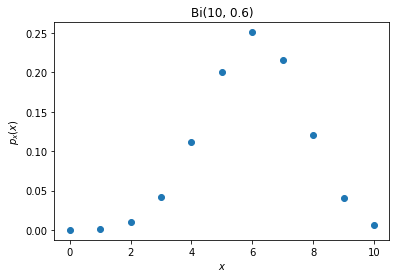

In [11]:
x = np.arange(11) # pole hodnot 0,...,10
plt.plot(x, stats.binom.pmf(x, 10, 0.6), 'o')
plt.xlabel('$x$')      # popisek osy x
plt.ylabel('$p_x(x)$') # popisek osy y
plt.title('Bi(10, 0.6)');

---

Porovnání normalizovaného histogramu vzorků a hustoty pravděpodobnosti normovaného normálního rozdělení

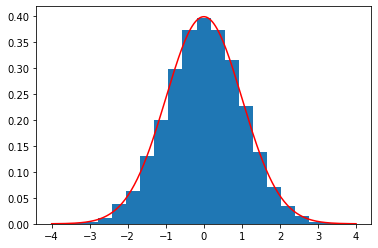

In [12]:
N = 10000
samples = stats.norm.rvs(0, 1, size=N)    # náhodné vzorky 
plt.hist(samples, bins=20, density=True)  # vykreslení normalizovaného histogramu (density=True)
x = np.linspace(-4, 4, 200)               # 200 rovnoměrně odstupňovaných ohodnot od -4 do 4 
plt.plot(x, stats.norm.pdf(x, 0, 1), 'r'); # vykreslení hustoty pravděpodobnosti    

---